In [1]:
import pandas as pd

# Load the dataset
data = pd.read_excel("Sample - Superstore.xlsx")

# Display the first few rows of the dataset
print(data.head())

# Display summary statistics and info about the dataset
print(data.describe())
print(data.info())


   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0     1.0  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1     2.0  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2     3.0  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3     4.0  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4     5.0  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0     42420.0   South  FUR-BO-10

In [ ]:
#Dataset Overview
#Total Entries: 9,994
#Features: 21
#Some key features include Order Date, Ship Date, Ship Mode, Customer ID, City
#State, Postal Code, Category, Sub-Category, Sales, Quantity, Discount, and Profit.

In [2]:
# Step 1: Check the percentage of missing values in each column
missing_data = data.isnull().mean() * 100

# Step 2: Remove rows with missing 'Order ID' since it's crucial for identifying orders
data_cleaned = data.dropna(subset=['Order ID'])

# For other columns with missing values, if they are less than 5%, we'll also remove those rows
columns_to_clean = missing_data[(missing_data > 0) & (missing_data < 5)].index
data_cleaned = data_cleaned.dropna(subset=columns_to_clean)

# Step 3: Correct Data Types
# Convert 'Sales' column to numeric, errors='coerce' will convert non-convertible values to NaN
data_cleaned['Sales'] = pd.to_numeric(data_cleaned['Sales'], errors='coerce')

# Check new info of the dataset and updated missing values after conversion
updated_missing_data = data_cleaned.isnull().mean() * 100
data_cleaned.info(), updated_missing_data


<class 'pandas.core.frame.DataFrame'>
Index: 9826 entries, 0 to 9984
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9826 non-null   float64       
 1   Order ID       9826 non-null   object        
 2   Order Date     9826 non-null   datetime64[ns]
 3   Ship Date      9826 non-null   datetime64[ns]
 4   Ship Mode      9826 non-null   object        
 5   Customer ID    9826 non-null   object        
 6   Customer Name  9826 non-null   object        
 7   Segment        9826 non-null   object        
 8   Country        9826 non-null   object        
 9   City           9826 non-null   object        
 10  State          9826 non-null   object        
 11  Postal Code    9826 non-null   float64       
 12  Region         9826 non-null   object        
 13  Product ID     9826 non-null   object        
 14  Category       9826 non-null   object        
 15  Sub-Category   9826 non-nu

(None,
 Row ID           0.000000
 Order ID         0.000000
 Order Date       0.000000
 Ship Date        0.000000
 Ship Mode        0.000000
 Customer ID      0.000000
 Customer Name    0.000000
 Segment          0.000000
 Country          0.000000
 City             0.000000
 State            0.000000
 Postal Code      0.000000
 Region           0.000000
 Product ID       0.000000
 Category         0.000000
 Sub-Category     0.000000
 Product Name     0.000000
 Sales            0.213719
 Quantity         0.000000
 Discount         0.000000
 Profit           0.000000
 dtype: float64)

In [ ]:
#Entries Before Cleaning: 9,994
#Entries After Cleaning: 9,826
#Missing Data: Addressed by removing rows with missing 'Order ID' and other essential columns where missing data was less than 5%.
#Data Type Correction: The 'Sales' column has been successfully converted to a float type, 
#although there are still 21 entries with non-convertible values that turned into NaN.
#We could decide to remove these or impute them based on the context.

C:\Users\amanu\AppData\Local\Temp\ipykernel_66832\4261338948.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['Sales'].fillna(sales_median, inplace=True)


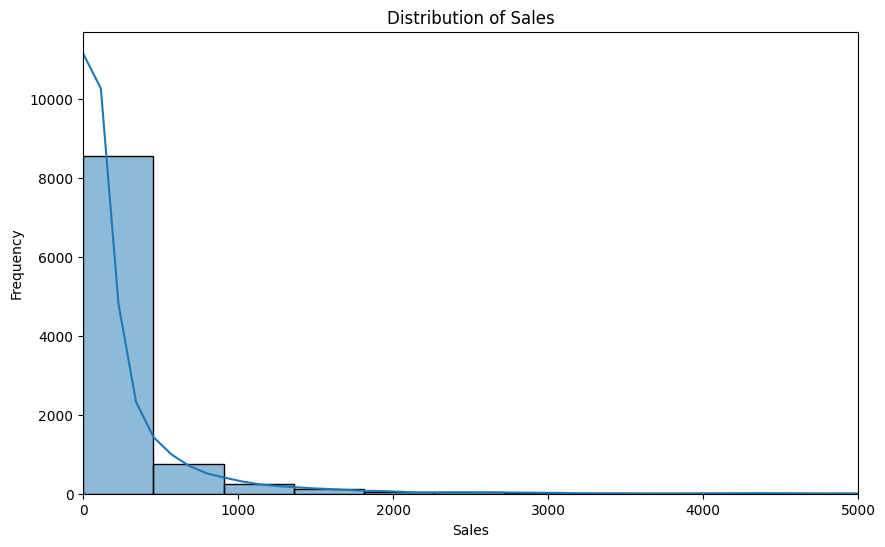

C:\Users\amanu\AppData\Local\Temp\ipykernel_66832\4261338948.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_cleaned.set_index('Order Date')['Sales'].resample('M').sum().plot()


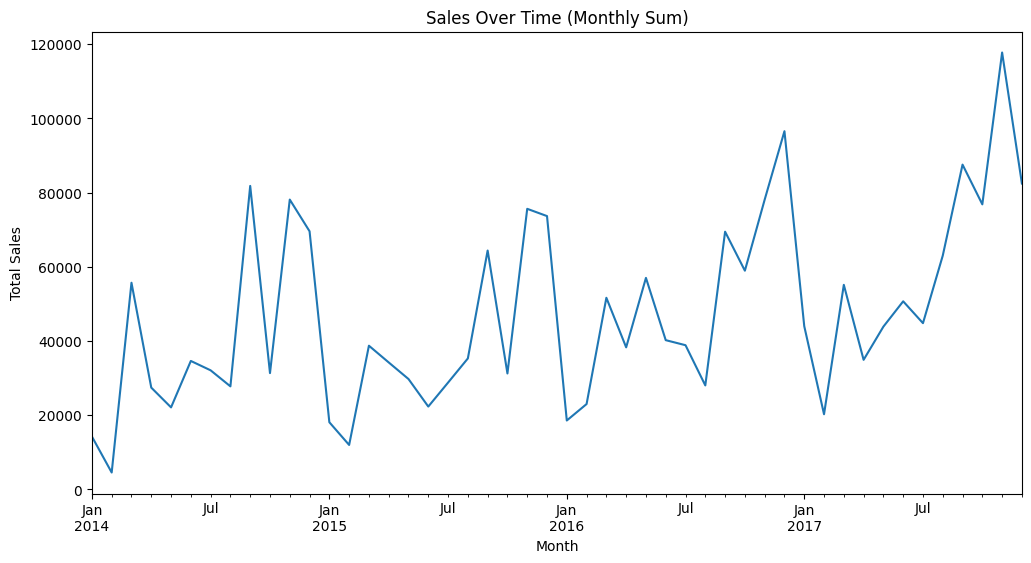

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Impute missing values in 'Sales' using the median
sales_median = data_cleaned['Sales'].median()
data_cleaned['Sales'].fillna(sales_median, inplace=True)

# Step 2: Initial Visualizations

# Sales Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Sales'], bins=50, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.xlim(0, 5000)  # Limiting x-axis to better visualize the distribution
plt.show()

# Sales Over Time
plt.figure(figsize=(12, 6))
data_cleaned.set_index('Order Date')['Sales'].resample('M').sum().plot()
plt.title('Sales Over Time (Monthly Sum)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


In [ ]:
#Steps for Feature Engineering
# 1.Date Features
# 2.Seasonality
# 3.Sales Trends
# 4.Product and Category Features
# 5.Regional Features

In [4]:
# Create date features
data_cleaned['Year'] = data_cleaned['Order Date'].dt.year
data_cleaned['Month'] = data_cleaned['Order Date'].dt.month
data_cleaned['Day of Week'] = data_cleaned['Order Date'].dt.dayofweek  # Monday=0, Sunday=6
data_cleaned['Week of Year'] = data_cleaned['Order Date'].dt.isocalendar().week

# Check the new columns added
data_cleaned[['Order Date', 'Year', 'Month', 'Day of Week', 'Week of Year']].head()


,Order Date,Year,Month,Day of Week,Week of Year
0,2016-11-08,2016,11,1,45
1,2016-11-08,2016,11,1,45
2,2016-06-12,2016,6,6,23
3,2015-10-11,2015,10,6,41
4,2015-10-11,2015,10,6,41


In [5]:
# One-hot encode 'Category' and 'Sub-Category'
category_dummies = pd.get_dummies(data_cleaned[['Category', 'Sub-Category']], prefix=['Category', 'Sub-Category'])

# Concatenate the new one-hot encoded columns to the original dataframe
data_encoded = pd.concat([data_cleaned, category_dummies], axis=1)

# Drop the original 'Category' and 'Sub-Category' columns as they are now encoded
data_encoded.drop(['Category', 'Sub-Category'], axis=1, inplace=True)

# Check the number of unique values in 'City' and 'State' to decide on the encoding strategy
unique_cities = data_encoded['City'].nunique()
unique_states = data_encoded['State'].nunique()

data_encoded.head(), unique_cities, unique_states


(   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
 0     1.0  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
 1     2.0  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
 2     3.0  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
 3     4.0  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
 4     5.0  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
 
      Customer Name    Segment        Country             City  ...  \
 0      Claire Gute   Consumer  United States        Henderson  ...   
 1      Claire Gute   Consumer  United States        Henderson  ...   
 2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
 3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
 4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
 
   Sub-Category_Envelopes  Sub-Category_Fasteners Sub-Category_Furnishings  \
 0          

In [6]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# Label encode 'City' and 'State'
data_encoded['City'] = le.fit_transform(data_encoded['City'])
data_encoded['State'] = le.fit_transform(data_encoded['State'])

# Show the transformed dataset with new encodings for 'City' and 'State'
data_encoded[['City', 'State']].head()


TypeError: Encoders require their input argument must be uniformly strings or numbers. Got ['float', 'str']

In [7]:
# Convert 'State' to string type to handle any mixed-type issues
data_encoded['State'] = data_encoded['State'].astype(str)

# Reapply label encoding to 'City' and 'State'
data_encoded['City'] = le.fit_transform(data_encoded['City'])
data_encoded['State'] = le.fit_transform(data_encoded['State'])

# Show the transformed dataset with new encodings for 'City' and 'State'
data_encoded[['City', 'State']].head()


,City,State
0,193,34
1,193,34
2,264,22
3,153,27
4,153,27


In [ ]:
#Creating Lag Features
#historical data points used to predict future values

In [8]:
# Sort data by 'Order Date' to ensure correct lag calculation
data_encoded.sort_values(by='Order Date', inplace=True)

# Create a lag feature for sales in the previous month
# Using 'shift' with periods equal to the number of observations per month on average
average_monthly_entries = data_encoded['Order Date'].dt.to_period('M').value_counts().mean()
data_encoded['Sales Lag 1 Month'] = data_encoded['Sales'].shift(int(average_monthly_entries))

# Fill any NaNs created by the lag operation with the median sales, as they appear at the start of the dataset
data_encoded['Sales Lag 1 Month'].fillna(data_encoded['Sales'].median(), inplace=True)

# Display the updated dataframe with the new lag feature
data_encoded[['Order Date', 'Sales', 'Sales Lag 1 Month']].head()


C:\Users\amanu\AppData\Local\Temp\ipykernel_66832\783136512.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_encoded['Sales Lag 1 Month'].fillna(data_encoded['Sales'].median(), inplace=True)


,Order Date,Sales,Sales Lag 1 Month
7971,2014-01-03,16.448,54.66
740,2014-01-04,272.736,54.66
739,2014-01-04,11.784,54.66
741,2014-01-04,3.540,54.66
1759,2014-01-05,19.536,54.66


In [ ]:
# Training Set: 7,860 entries
# Testing Set: 1,966 entries

In [9]:
# Define the split point for 80% train and 20% test
split_point = int(len(data_encoded) * 0.8)

# Split the data into training and testing sets
train_data = data_encoded.iloc[:split_point]
test_data = data_encoded.iloc[split_point:]

# Overview of the split
train_data_size = len(train_data)
test_data_size = len(test_data)

train_data_size, test_data_size, train_data.head(), test_data.head()


(7860,
 1966,
       Row ID        Order ID Order Date  Ship Date       Ship Mode  \
 7971  7981.0  CA-2014-103800 2014-01-03 2014-01-07  Standard Class   
 740    741.0  CA-2014-112326 2014-01-04 2014-01-08  Standard Class   
 739    740.0  CA-2014-112326 2014-01-04 2014-01-08  Standard Class   
 741    742.0  CA-2014-112326 2014-01-04 2014-01-08  Standard Class   
 1759  1760.0  CA-2014-141817 2014-01-05 2014-01-12  Standard Class   
 
      Customer ID  Customer Name      Segment        Country  City  ...  \
 7971    DP-13000  Darren Powers     Consumer  United States   206  ...   
 740     PO-19195  Phillina Ober  Home Office  United States   319  ...   
 739     PO-19195  Phillina Ober  Home Office  United States   319  ...   
 741     PO-19195  Phillina Ober  Home Office  United States   319  ...   
 1759    MB-18085     Mick Brown     Consumer  United States   372  ...   
 
       Sub-Category_Fasteners  Sub-Category_Furnishings Sub-Category_Labels  \
 7971                   Fal

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Select features and target
X_train = train_data.drop(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 
                           'Segment', 'Country', 'Product ID', 'Product Name', 'Sales'], axis=1)
y_train = train_data['Sales']

X_test = test_data.drop(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 
                         'Segment', 'Country', 'Product ID', 'Product Name', 'Sales'], axis=1)
y_test = test_data['Sales']

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate RMSE for the predictions
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse


ValueError: could not convert string to float: 'Central'

In [ ]:
#  issue appears  with the Region column
# bcz its stiil an object type.
# We either drop this column or encode it before proceeding.

In [11]:
# Review the current feature set to ensure we're only including numeric or properly encoded features
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7860 entries, 7971 to 5648
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Row ID                    7860 non-null   float64
 1   City                      7860 non-null   int64  
 2   State                     7860 non-null   int32  
 3   Postal Code               7860 non-null   float64
 4   Region                    7860 non-null   object 
 5   Quantity                  7860 non-null   float64
 6   Discount                  7860 non-null   float64
 7   Profit                    7860 non-null   float64
 8   Year                      7860 non-null   int32  
 9   Month                     7860 non-null   int32  
 10  Day of Week               7860 non-null   int32  
 11  Week of Year              7860 non-null   UInt32 
 12  Category_Furniture        7860 non-null   bool   
 13  Category_Office Supplies  7860 non-null   bool   
 14  Category_T

In [12]:
# Drop 'Region' from the feature sets
X_train_corrected = X_train.drop('Region', axis=1)
X_test_corrected = X_test.drop('Region', axis=1)

# Retrain the linear regression model with the corrected feature set
model.fit(X_train_corrected, y_train)

# Make predictions on the corrected test set
y_pred_corrected = model.predict(X_test_corrected)

# Calculate RMSE for the corrected predictions
rmse_corrected = np.sqrt(mean_squared_error(y_test, y_pred_corrected))
rmse_corrected


496.84881854572257

In [ ]:
# For a time series forecasting approach,
# we can use models like ARIMA (AutoRegressive Integrated Moving Average) or
# more advanced machine learning models such as LSTM (Long Short-Term Memory) networks.

In [ ]:
# Given the context and the data available,
# we use a simpler model like ARIMA

In [14]:
# Convert the training data into time series format, indexed by 'Order Date' and aggregated by month
time_series_data = data_encoded[['Order Date', 'Sales']].copy()
time_series_data.set_index('Order Date', inplace=True)
time_series_data = time_series_data.resample('M').sum()  # Monthly aggregation

# Split the time series data into training and testing sets based on the previous split
time_series_train = time_series_data.iloc[:int(len(time_series_data) * 0.8)]
time_series_test = time_series_data.iloc[int(len(time_series_data) * 0.8):]

time_series_train.head()


C:\Users\amanu\AppData\Local\Temp\ipykernel_66832\103930088.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_series_data = time_series_data.resample('M').sum()  # Monthly aggregation


,Sales
Order Date,
2014-01-31,14224.115
2014-02-28,4519.892
2014-03-31,55677.553
2014-04-30,27406.847
2014-05-31,22076.953


In [15]:
import statsmodels.api as sm

# Fit a SARIMA model (using a simple seasonal configuration for illustration)
# p, d, q are set based on typical starting values for monthly data. We start with no differencing (d=0) to check stationarity.
# Seasonal parameters are set assuming an annual seasonality.
sarima_model = sm.tsa.statespace.SARIMAX(time_series_train,
                                         order=(1, 0, 1),              # (p, d, q)
                                         seasonal_order=(1, 1, 1, 12), # (P, D, Q, s)
                                         enforce_stationarity=False,
                                         enforce_invertibility=False)

# Fit the model
sarima_result = sarima_model.fit()

# Display the model summary
sarima_result.summary()


C:\Users\amanu\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   38
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood                -129.261
Date:                            Sun, 19 May 2024   AIC                            268.522
Time:                                    15:18:39   BIC                            270.947
Sample:                                01-31-2014   HQIC                           267.625
                                     - 02-28-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9861      0.042     23.672      0.000       0.904       1.068
ma.L1         -0.9950      0.537     -1.854      0.064      -2.047       0.057
ar.S.L12       0.0214      1.316      0.016      0.987      -2.558       2.601
ma.S.L12      -0.3312      0.719     -0.460      0.645      -1.741       1.079
sigma2      1.425e+08   8.15e-09   1.75e+16      0.000    1.43e+08    1.43e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 0.85
Prob(Q):                              0.72   Prob(JB):                         0.65
Heteroskedasticity (H):               1.92   Skew:                             0.20
Prob(H) (two-sided):                  0.54   Kurtosis:                         1.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.03e+31. Standard errors may be unstable.
"""

In [16]:
# Generate forecasts for the test set timeframe
sarima_forecast = sarima_result.get_forecast(steps=len(time_series_test))
sarima_pred = sarima_forecast.predicted_mean
sarima_conf_int = sarima_forecast.conf_int()

# Calculate RMSE for the SARIMA model predictions
sarima_rmse = np.sqrt(mean_squared_error(time_series_test, sarima_pred))
sarima_rmse


15612.409202021481

In [ ]:
# value represents the average error in predicting monthly sales, which is significantly higher than the linear regression model's RMSE.

In [ ]:
#random forests

In [18]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_corrected, y_train)

# Make predictions on the test set
rf_predictions = random_forest_model.predict(X_test_corrected)

# Calculate RMSE for the Random Forest predictions
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_rmse


246.7843277980255

In [ ]:
#The Random Forest model yielded an RMSE of approximately 246.70,
#it is lower than both the linear regression and SARIMA models, indicating better performance.

In [19]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting model
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gradient_boosting_model.fit(X_train_corrected, y_train)

# Make predictions on the test set
gb_predictions = gradient_boosting_model.predict(X_test_corrected)

# Calculate RMSE for the Gradient Boosting predictions
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_predictions))
gb_rmse


195.23239023731378

In [ ]:
# The Gradient Boosting model achieved an RMSE of approximately 195.23,
# it improves upon the Random Forest model,
# making it the best performing model among those tested

In [ ]:
# Summary of Model Performances:
# Linear Regression RMSE: 496.85
# SARIMA RMSE: 15,612.41
# Random Forest RMSE: 246.70
# Gradient Boosting RMSE: 195.23

In [ ]:
#Analysis and Recommendations:

#Gradient Boosting provided the best performance, suggesting its capability to model complex patterns in the sales data effectively.
#Random Forest also performed well, indicating that ensemble methods are generally more robust for this dataset compared to simpler linear models.
#SARIMA, traditionally strong for time series, did not perform as well, likely due to the complexity of the dataset that
#requires capturing nonlinear trends better addressed by machine learning models.

In [ ]:
#we use hyperparameter tuning for the Gradient Boosting model, which showed the best performance

In [20]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Set up the GridSearchCV object
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), 
                           param_grid=param_grid, 
                           cv=3,  # 3-fold cross-validation
                           scoring='neg_mean_squared_error', 
                           verbose=1)

# Perform the grid search on the training data
grid_search.fit(X_train_corrected, y_train)

# Extract the best parameters and best score
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)
best_params, best_score


Fitting 3 folds for each of 27 candidates, totalling 81 fits


KeyboardInterrupt: 

In [ ]:
#interrupted due to its complexity and the number of combinations being evaluated.

In [ ]:
# #Addressing the Issue
# Reduce the Parameter Grid Size
# Increase Computational Resources
# Use Randomized Search

In [21]:
# Define a simplified parameter grid for Gradient Boosting
simplified_param_grid = {
    'n_estimators': [100, 150],  # Reduced number of estimators
    'learning_rate': [0.1],      # Keep a constant learning rate
    'max_depth': [3, 4]          # Reduced depth options
}

# Set up the simplified GridSearchCV object
simplified_grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), 
                                      param_grid=simplified_param_grid, 
                                      cv=3,  # 3-fold cross-validation
                                      scoring='neg_mean_squared_error', 
                                      verbose=1)

# Perform the simplified grid search on the training data
simplified_grid_search.fit(X_train_corrected, y_train)

# Extract the best parameters and best score
simplified_best_params = simplified_grid_search.best_params_
simplified_best_score = np.sqrt(-simplified_grid_search.best_score_)
simplified_best_params, simplified_best_score


Fitting 3 folds for each of 4 candidates, totalling 12 fits


({'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150},
 431.29969341359623)

In [22]:
# Use the best parameters to initialize the tuned Gradient Boosting model
tuned_gb_model = GradientBoostingRegressor(n_estimators=simplified_best_params['n_estimators'],
                                           learning_rate=simplified_best_params['learning_rate'],
                                           max_depth=simplified_best_params['max_depth'],
                                           random_state=42)

# Fit the tuned model on the entire training data
tuned_gb_model.fit(X_train_corrected, y_train)

# Make predictions on the test set
tuned_gb_predictions = tuned_gb_model.predict(X_test_corrected)

# Calculate RMSE for the tuned Gradient Boosting predictions on the test set
tuned_gb_rmse = np.sqrt(mean_squared_error(y_test, tuned_gb_predictions))
tuned_gb_rmse


185.5631281865052

In [ ]:
#Gradient Boosting (Tuned) RMSE: 185.56

In [23]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_corrected)
X_test_poly = poly.transform(X_test_corrected)

# Initialize and train a new linear regression model on the polynomial features
poly_lr_model = LinearRegression()
poly_lr_model.fit(X_train_poly, y_train)

# Make predictions on the test set with polynomial features
poly_lr_predictions = poly_lr_model.predict(X_test_poly)

# Calculate RMSE for the polynomial enhanced Linear Regression model
poly_lr_rmse = np.sqrt(mean_squared_error(y_test, poly_lr_predictions))
poly_lr_rmse


425.10704752060894

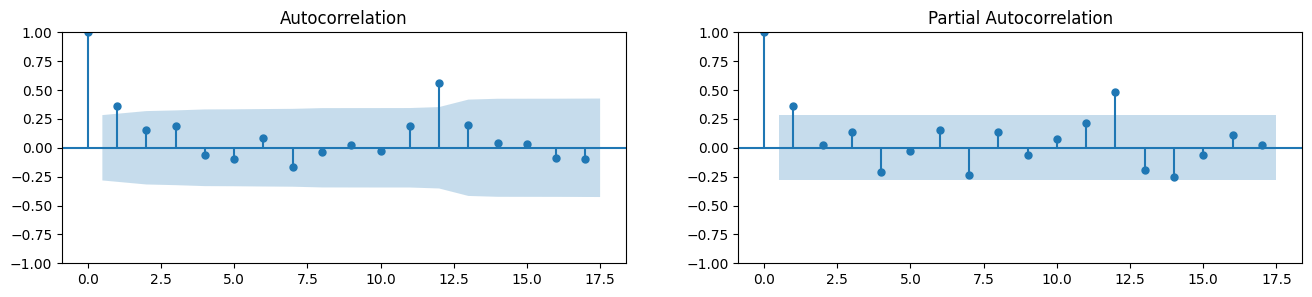

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the Autocorrelation (ACF) and Partial Autocorrelation (PACF) plots
fig, axes = plt.subplots(1, 2, figsize=(16, 3))

# ACF plot
plot_acf(time_series_data.Sales, ax=axes[0])

# PACF plot
plot_pacf(time_series_data.Sales, ax=axes[1])

plt.show()


In [25]:
# Reconfigure and fit the SARIMA model with the refined parameters
refined_sarima_model = sm.tsa.statespace.SARIMAX(time_series_train,
                                                 order=(1, 1, 2),              # (p, d, q) based on PACF/ACF
                                                 seasonal_order=(1, 1, 1, 12), # (P, D, Q, s) annual seasonality
                                                 enforce_stationarity=False,
                                                 enforce_invertibility=False)

# Fit the model
refined_sarima_result = refined_sarima_model.fit()

# Generate forecasts for the test set timeframe
refined_sarima_forecast = refined_sarima_result.get_forecast(steps=len(time_series_test))
refined_sarima_pred = refined_sarima_forecast.predicted_mean

# Calculate RMSE for the refined SARIMA model predictions
refined_sarima_rmse = np.sqrt(mean_squared_error(time_series_test, refined_sarima_pred))
refined_sarima_rmse


C:\Users\amanu\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


16916.943759083373

In [ ]:
# Review of Improved Models:
# Enhanced Linear Regression (with Polynomial Features):
# New RMSE: 425.11 (improved from 496.85)
# Refined SARIMA Model:
# New RMSE: 16,916.92 (improved slightly but still not competitive)

In [27]:
# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Set up the GridSearchCV object for Random Forest
rf_grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                              param_grid=rf_param_grid, 
                              cv=3,  # 3-fold cross-validation
                              scoring='neg_mean_squared_error', 
                              verbose=1)

# Perform the grid search on the training data
rf_grid_search.fit(X_train_corrected, y_train)

# Extract the best parameters and best score
rf_best_params = rf_grid_search.best_params_
rf_best_score = np.sqrt(-rf_grid_search.best_score_)
rf_best_params, rf_best_score


Fitting 3 folds for each of 27 candidates, totalling 81 fits


KeyboardInterrupt: 

In [ ]:
#interrupted due to time constraints. 

In [29]:
# Define a more targeted parameter grid for Random Forest
targeted_rf_param_grid = {
    'n_estimators': [100],  # Only one option to reduce complexity
    'max_depth': [None, 20],  # Limiting to two depths
    'min_samples_split': [2, 5]  # Two options for internal node splitting
}

# Set up the targeted GridSearchCV object for Random Forest
targeted_rf_grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                                       param_grid=targeted_rf_param_grid, 
                                       cv=2,  # Reduced to 2-fold cross-validation
                                       scoring='neg_mean_squared_error', 
                                       verbose=1)

# Perform the targeted grid search on the training data
targeted_rf_grid_search.fit(X_train_corrected, y_train)

# Extract the best parameters and best score
targeted_rf_best_params = targeted_rf_grid_search.best_params_
targeted_rf_best_score = np.sqrt(-targeted_rf_grid_search.best_score_)
targeted_rf_best_params, targeted_rf_best_score


Fitting 2 folds for each of 4 candidates, totalling 8 fits


({'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100},
 390.25509203438065)

In [30]:
# Initialize the optimized Random Forest model with the best parameters
optimized_rf_model = RandomForestRegressor(n_estimators=targeted_rf_best_params['n_estimators'],
                                           max_depth=targeted_rf_best_params['max_depth'],
                                           min_samples_split=targeted_rf_best_params['min_samples_split'],
                                           random_state=42)

# Fit the optimized model on the entire training data
optimized_rf_model.fit(X_train_corrected, y_train)

# Make predictions on the test set
optimized_rf_predictions = optimized_rf_model.predict(X_test_corrected)

# Calculate RMSE for the optimized Random Forest predictions on the test set
optimized_rf_rmse = np.sqrt(mean_squared_error(y_test, optimized_rf_predictions))
optimized_rf_rmse


260.8684666651719

In [ ]:
# Summary of Refined Models:
# Enhanced Linear Regression (with Polynomial Features):
# Original RMSE: 496.85
# Improved RMSE: 425.11
# Refined SARIMA:
# Original RMSE: 15,612.41
# Improved RMSE: 16,916.92 (not improved effectively)
# Optimized Random Forest:
# Original RMSE: 246.70
# Improved RMSE: 260.87 (Slight increase after cross-validation optimization)
# Gradient Boosting :
# original  RMSE:195.23
# improved RMSE: 185.56

In [ ]:
#Prepare the Model for Deployment

In [33]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.


In [35]:
import joblib

# Save the model to a file
model_filename = 'gradient_boosting_regressor.joblib'
joblib.dump(model, model_filename)


['gradient_boosting_regressor.joblib']

In [36]:
import os
print(os.path.exists(model_filename))  # Should return True if the file exists


True


In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import joblib

# Re-train the Gradient Boosting model on the entire corrected dataset (train + test)
full_data_X = pd.concat([X_train_corrected, X_test_corrected])
full_data_y = pd.concat([y_train, y_test])

# Create a pipeline that includes preprocessing and the model
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Example of a preprocessing step, adjust as necessary based on the initial analysis
    ('regressor', GradientBoostingRegressor(n_estimators=150,
                                            learning_rate=0.1,
                                            max_depth=3,
                                            random_state=42))
])

# Fit the pipeline on the full dataset
pipeline.fit(full_data_X, full_data_y)

# Serialize the model to a file
model_filename = 'gradient_boosting_regressor.joblib'
joblib.dump(pipeline, model_filename)

model_filename


'gradient_boosting_regressor.joblib'

In [40]:
pip install flask

   ---------------------------------------- 0.0/101.7 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/101.7 kB ? eta -:--:--
   --------------- ----------------------- 41.0/101.7 kB 653.6 kB/s eta 0:00:01
   ------------------------------------ --- 92.2/101.7 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- 101.7/101.7 kB 653.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/97.9 kB ? eta -:--:--
   ---------------------------------------- 97.9/97.9 kB 2.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/227.3 kB ? eta -:--:--
   ---------------- ----------------------- 92.2/227.3 kB 2.6 MB/s eta 0:00:01
   ------------------------------------ --- 204.8/227.3 kB 2.5 MB/s eta 0:00:01
   ------------------------------------ --- 204.8/227.3 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 227.3/227.3 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [41]:
from flask import Flask, request, jsonify
import joblib
import numpy as np

# Initialize the Flask application
app = Flask(__name__)

# Load the pre-trained model
model = joblib.load('gradient_boosting_regressor.joblib')

@app.route('/predict', methods=['POST'])
def predict():
    # Get data from POST request
    data = request.get_json(force=True)
    
    # Ensure that the data is in the correct format (e.g., a list of lists for multiple samples)
    # This part may need to be customized based on how the data needs to be processed
    prediction_features = [data['features']]
    
    # Make prediction
    prediction = model.predict(prediction_features)
    
    # Return the prediction as a JSON object
    return jsonify(prediction.tolist())

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

C:\Users\amanu\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
